In [1]:
import numpy as np
from numpy import pi, sin, cos, sqrt
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.special import hyp2f1

import scipy.constants as sc
import libstempo as T
import libstempo.plot as LP, libstempo.toasim as LT
import ecc_res

In [2]:
def get_dedtau(tau, e):
    dedtau = (1 - e*e)**(3./2)/(e**(29./19) * (121*e*e + 304)**(1181./2299))
    return dedtau

In [3]:
e0 = 2.5e-9
tau0 = (e0 * 19**(145./242) /(2**(559./726) * 3**(19./48)))**(48./19)

In [4]:
sol = solve_ivp(get_dedtau, (tau0, 500), [e0], dense_output = False, rtol = 1e-12, atol = 1e-15)

In [5]:
es = sol.y
taus = sol.t

In [6]:
taus

array([1.38499607e-21, 2.19407913e-21, 2.96613597e-21, 4.11069876e-21,
       5.62125118e-21, 7.66097474e-21, 1.03821196e-20, 1.40015036e-20,
       1.87910083e-20, 2.51011203e-20, 3.33780170e-20, 4.41887657e-20,
       5.82509128e-20, 7.64692293e-20, 9.99804451e-20, 1.30207788e-19,
       1.68927192e-19, 2.18347461e-19, 2.81207044e-19, 3.60890537e-19,
       4.61568565e-19, 5.88365275e-19, 7.47558393e-19, 9.46817572e-19,
       1.19548768e-18, 1.50492468e-18, 1.88889302e-18, 2.36403461e-18,
       2.95042124e-18, 3.67220375e-18, 4.55837343e-18, 5.64365315e-18,
       6.96953832e-18, 8.58551051e-18, 1.05504497e-17, 1.29342746e-17,
       1.58198446e-17, 1.93051612e-17, 2.35059111e-17, 2.85584001e-17,
       3.46229321e-17, 4.18876928e-17, 5.05732097e-17, 6.09374628e-17,
       7.32817343e-17, 8.79572936e-17, 1.05373026e-16, 1.26004124e-16,
       1.50401983e-16, 1.79205442e-16, 2.13153542e-16, 2.53099991e-16,
       3.00029535e-16, 3.55076469e-16, 4.19545544e-16, 4.94935539e-16,
      

In [7]:
es = np.reshape(sol.y,len(taus))

In [8]:
tau_e = np.vstack((taus, es)).T

In [9]:
fun_e_tau = interp1d(taus,es)

In [10]:
fun_tau_e = interp1d(es, taus)

In [2]:
#gw postion
gwphi = 3.1
gwtheta = -np.pi/3.5
log10_dist = 6.0

#orbital parameters
q = 0.99999775 
log10_mc = 7.82625455
log10_fgw = -8.
e0 = 1e-4
l0 = 0
gamma0 = 0
inc = np.pi/3
psi = 0

In [5]:
parfile = '../../ecc_signal_create/ecc_sim_data/ideal_data/B1855+09_simulate.par'
timfile = '../../ecc_signal_create/ecc_sim_data/ideal_data/B1855+09_simulate.tim'

In [6]:
psr = T.tempopulsar(parfile = parfile,timfile = timfile)

In [7]:
pdist = np.float64(1.0/(psr['PX'].val))/1000.0 #distance of pulsar in kpc
phi = np.float64(psr['ELONG'].val) #grabs the ecliptic longitude from the par file
theta = np.float64(psr['ELAT'].val) #grabs the ecliptic latitude from the par file
toas = np.double(psr.toas()) #toas
toas *= 86400

In [8]:
ewf = ecc_res.add_ecc_cgw(toas, theta, phi, pdist, gwtheta=gwtheta, gwphi=gwphi, log10_mc=log10_mc, q=q, log10_fgw=log10_fgw, e0=e0, l0=l0, gamma0=gamma0, 
                    inc=inc, psi=psi, log10_dist=log10_dist, l_P=None, gamma_P=None, tref=55000, 
                    psrterm=True, evol=True, waveform_cal=True, res='Both')

toas[0]: 4610193724.957526
toa size: 5618
<class 'numpy.ndarray'>
enterprise is here 1
enterprise is here 2
enterprise is in waveform.calculate_sp_sx
toas type: <class 'numpy.ndarray'>
min toas: 4610193724.957526 max toas: 4957262976.168973
toas size: 5618 toa_sample: 4017 mc: 67027735.93 q: 1.00 n0: 0.00 e0: 0.00 l0: 0.00 gamma0: 0.00 mc: 4752000000
evolving orbit
in evolve orbit
got m, eta, e02
got A and P
in tau_from_e
going to fun_tau_e
got taus?
got es and ns
got alpha, lbar0, and lbars
got beta, gbar0, gbar, and gamma1
got gbar20, gbar2, and gamma2
got ns, es, ls, gammas
4017 4017 4017 4017
calculating waveform
in get_x_u_phi
(4017,) (4017,)
in mikkola_array.py in get_u
made it through the if statment
got sgn and l
got ncycles
got ncycles and l
got alpha and alpha3
got beta and beta2
made it through the beta>0 if statment
made it through the beta <= 0 if statment
got s and s5
got w and w3
got E0 and u
got esu and ecu
got fu, f1u, f2u, f3u, and f4u
got u1, u2, u3, u4, and xi
got s

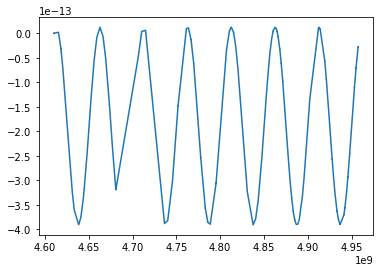

In [8]:
plt.plot(toas, ewf)

In [19]:
mc = 10**log10_mc
F0 = 10**log10_fgw
n0 = 2 * np.pi * F0

In [20]:
toas *= 86400
ts = np.linspace(np.min(toas), np.max(toas), int((np.max(toas) - np.min(toas))/86400), endpoint=True)
tref = 55000

In [21]:
tau0 = fun_tau_e(e0)

In [22]:
tau0

array(7.24826696)

In [23]:
GMsun = 1.327124400e20  # measured more precisely than Msun alone!
c = sc.speed_of_light
TSUN = GMsun / c**3
parsec = sc.parsec
KPC2S = parsec/c * 1e3

In [24]:
m = (((1+q)**2)/q)**(3/5) * mc
eta = q/(1+q)**2
e02 = e0*e0

A = (TSUN * mc)**(5./3)/5
P = (A/3.)* n0**(8./3)*e0**(48./19)*(304 + 121*e02)**(3480./2299)/(1 - e02)**4


taus = tau0 - P*(ts - tref)

In [25]:
taus

array([7.22015267, 7.22015214, 7.22015161, ..., 7.21803717, 7.21803664,
       7.21803611])